# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows: 
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}).$$ <b>Hint:</b> The function input is a vector of labels and the function should return the entropy. (Use the logarithm with base 2. In principle, any base for the logarithm can be used. Changing the base will just change the unit of information. Computer scientists like to use the base 2. In this case information is measured in bits.)

In [ ]:
import math

def entropy(y):
    # Input: A 1D numpy array [0,1,0,0,2,...] of labels.
    #Output: A float representing the entropy of the labels.

    #So, first I need a matrix that contains the counts of each unique label in y.
    _, counts = np.unique(y, return_counts=True)

    #Then I use the counts to generate the probability of each label.
    S = counts / counts.sum()

    #Finally, I use the rest of the formula for entropy.
    S = -(S * np.log2(S)).sum()
    return S
    



Check if your solution is correct:

In [28]:
try:
    assert entropy(np.array([1,1,0,0])) == 1.
    assert entropy(np.array([0,0])) == 0.
    assert str(entropy(np.array([1,1,0,0,1,1])))[:8] == "0.918295"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [2,4,3,1,5]$ and label $y=[1,0,0,0,0]$ would result in the lists 
* $x_{right} = [4,3,5]$, $y_{right} = [0,0,0]$ (for $x > t$) and
* $x_{left} = [2,1]$, $y_{left} = [1,0]$ (for $x <= t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0]) - ((0.4 * \textbf{entropy}([1,0]))+(0.6 * \textbf{entropy}([0,0,0])))$

In [ ]:



def info_gain(x,y,t):
    # Triple input.
    # x: A 1D numpy array of features. []
    # y: A 1D numpy array of labels.
    # t: A float representing the threshold for splitting x.
    # Just as described above.
    
    #This creates two arrays with boolean values to identify which features pass the treshold.

    y_right, y_left = y[x > t], y[x <= t]
    IG = entropy(y) - (((len(y_right) / len(y)) * entropy(y_right)) + ((len(y_left) / len(y)) * entropy(y_left)))

    return IG 
#This only works when dividing the set into two. Can it be done for other partitions?

info_gain(np.array([2,4,3,1,5]),np.array([1,0,0,0,0]),2)

np.float64(0.3219280948873623)

Check if your solution is correct:

In [30]:
try:
    assert str(info_gain(np.array([5,2,3,44,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5))[:8] == "0.609986"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1))[:8] == "0.108031"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3))[:8] == "0.395815"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5))[:8] == "1.0"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6))[:8] == "0.609986"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets (the two returned variables should be named 'X' and 'label'). The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="./figures/dataset.png" width="600"/>

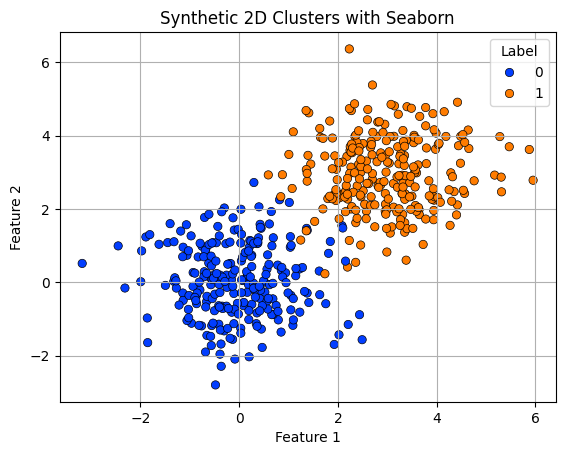

In [31]:
from sklearn.datasets import make_blobs
### WRITE YOUR CODE HERE ###

X, label = make_blobs(n_samples=500, n_features=2, centers=[(0, 0), (3, 3)])

df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Label"] = label

sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue="Label", palette="bright", edgecolor="k")
plt.title("Synthetic 2D Clusters with Seaborn")
plt.grid(True)
plt.show()

<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

In [ ]:

def find_best_split(x, y):
    best_gain = -1000000
    best_threshold = None

    for t in np.unique(x):
        gain = info_gain(x, y, t)
        if gain > best_gain:
            best_gain = gain
            best_threshold = t

    return best_threshold

find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]))

np.int64(5)

Check if your solution is correct:

In [38]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8    
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:

<img src="./figures/split.png" width="600"/>

* Which split would you prefer, and why?

In [ ]:
x_best = find_best_split(X[:,0],label)
y_best = find_best_split(X[:,1],label)
### WRITE YOUR CODE HERE ###

print(info_gain(X[:,0], label, x_best))
print(info_gain(X[:,1], label, x_best))

#Biggest gain = better treshold


0.7275075770057369
0.6507247111735398


## Train a Decision Tree
Now we train a decision tree using the sklearn package:

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_tree.fit(X, label)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:

<img src="./figures/dec.png" width="600"/>

* Can you find learning parameters for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?

Misclassified indices: (array([  0,  27,  30,  35,  64,  72, 108, 117, 246, 299, 310, 331, 333,
       349, 360, 361, 419, 440, 447, 452, 459, 465, 481, 498]),)


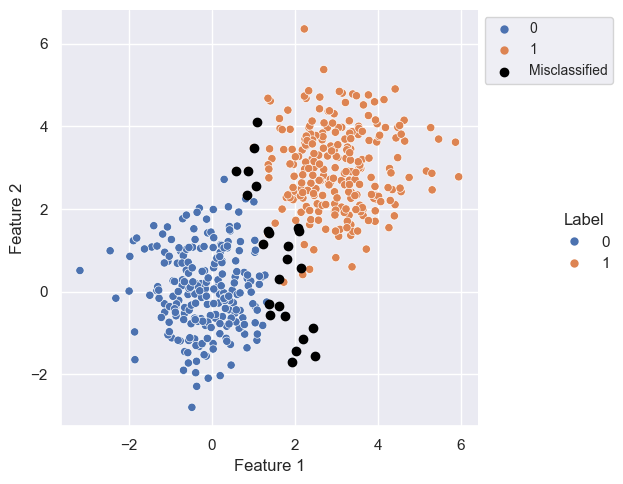

In [ ]:
### WRITE YOUR CODE HERE ###
y_pred = clf_tree.predict(X)
misclassified = np.where(y_pred != label)

sns.set_theme()
sns.relplot(
    data=df, x="Feature 1", y="Feature 2", hue="Label", 
)

plt.scatter(
    df.loc[misclassified, "Feature 1"],
    df.loc[misclassified, "Feature 2"],
    color="black",
    label="Misclassified",
)
plt.legend(fontsize="small", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
clf_tree = DecisionTreeClassifier( criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)[source]


Can you find learning parameters for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?

So, according to this source:
https://www.geeksforgeeks.org/how-to-tune-a-decision-tree-in-hyperparameter-tuning/

We have three main techniques for hyperparameter tuning.
One is grid search.
Another is randomized search.
Last is Bayesian Optimization.

In [91]:
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score

# 1. Define your model
clf_tree = DecisionTreeClassifier(criterion='entropy')

# 2. Define the search space
search_space = {
    'max_depth': (1, 50),                        # integers
    'min_samples_split': (2, 20),                 # integers
    'min_samples_leaf': (1, 20),                  # integers
    'max_features': (0.1, 1.0, 'uniform'),        # float: fraction of features
}

# 3. Set up BayesSearchCV
opt = BayesSearchCV(
    clf_tree,
    search_spaces=search_space,
    n_iter=32,                # Number of optimization steps
    scoring='accuracy',       # You can change to 'f1', etc.
    cv=5,                     # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                 # Use all CPU cores
)

# 4. Fit to your data (X_train, y_train)
opt.fit(X, label)

# 5. Best model and best hyperparameters
print("Best parameters:", opt.best_params_)
print("Best score:", opt.best_score_)

Best parameters: OrderedDict({'max_depth': 5, 'max_features': 0.7250995233131885, 'min_samples_leaf': 1, 'min_samples_split': 12})
Best score: 0.982
